# Laboratorio 3, Statistical Learning, KNN


## Importando librerías a utilizar

In [34]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Carga de datos Dataset

In [35]:
df = pd.read_csv('KNN_Dataset.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Exploración de datos para conocer mejor el dataset

In [36]:
df.sample(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
728,1,19,41,0,5,53.0,4,6,0.0,0,1,1
613,3,68,52,1,8,456.0,3,30,0.0,1,4,3
723,3,10,28,1,2,36.0,4,0,0.0,1,3,4
808,3,63,67,0,22,9.0,2,12,1.0,0,1,3
631,1,18,52,1,20,66.0,1,19,0.0,1,2,1
425,1,56,46,1,21,33.0,4,7,0.0,0,2,2
280,1,51,28,0,8,43.0,5,1,0.0,0,5,4
956,3,16,39,1,5,31.0,1,4,0.0,1,5,1
755,3,32,47,0,25,135.0,2,6,0.0,1,1,1
871,3,70,59,0,27,85.0,1,19,0.0,1,1,3


In [37]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Los valores de cutscat es el tipo de servicio que se tiene. Estos son:

1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

También se puede utilizar gráficas para revisar los datos, como el siguiente histograma

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

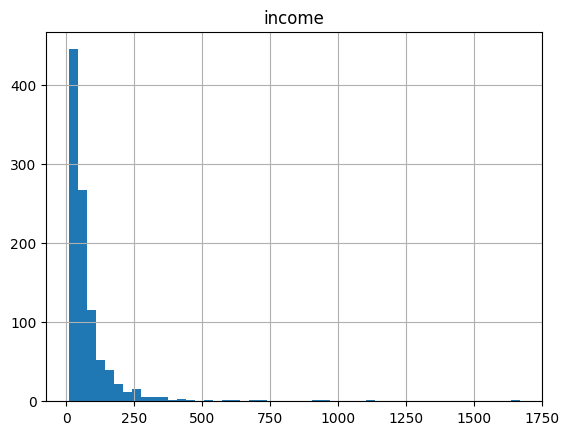

In [38]:
df.hist(column='income', bins=50)

En este, se puede ver el ingreso de los clientes que se tienen.

## Feature set

In [39]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [40]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [41]:
Y = df[['custcat']].values
Y[0:5]

array([[1],
       [4],
       [3],
       [1],
       [3]], dtype=int64)

Acá, se define que la variable dependiente es custcat, mientras que todo el resto es un conjunto de variables dependientes.

## Estandarización de los datos

Los datos deben ser estandarizados para evitar que una de las variables tenga un mayor peso que las demás.

In [42]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Split de los datos para entrenamiento y pruebas


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)

Set de Entrenamiento: (800, 11) (800, 1)
Set de Prueba: (200, 11) (200, 1)


## Clasificación

### k-vecinos más cercanos

In [44]:
from sklearn.neighbors import KNeighborsClassifier

#### Usando k = 4

In [45]:
k = 4
neigh = KNeighborsClassifier(n_neighbors= k).fit(X_train,y_train)
neigh

c:\Users\Silvio Alejandro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

##### Predicción

In [46]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

##### Evaluación de certeza

In [47]:
from sklearn import metrics
Acc1 = metrics.accuracy_score(y_train,neigh.predict(X_train))
Acc2 = metrics.accuracy_score(y_test,yhat)
print(f'entrenando certeza: {Acc1}')
print(f'Probando el set de certeza {Acc2}')

entrenando certeza: 0.5475
Probando el set de certeza 0.32


#### Usando k = 6

In [48]:
neigh2 = KNeighborsClassifier(n_neighbors= 6).fit(X_train,y_train)
yhat2 = neigh2.predict(X_test)
Acc21 = metrics.accuracy_score(y_train,neigh2.predict(X_train))
Acc22 = metrics.accuracy_score(y_test,yhat2)
print(f'Accuracy entrenada k = 6: {Acc21}')
print(f'Certeza del set: {Acc22}')

Accuracy entrenada k = 6: 0.51625
Certeza del set: 0.31


c:\Users\Silvio Alejandro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### Probando con distintos ks

In [56]:
Ks = 31
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Entrenar el Modelo y Predecir  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

c:\Users\Silvio Alejandro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Silvio Alejandro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Silvio Alejandro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Silvio Alejandro\AppData\Local\Programs\Python\Python39\lib\site-packages\sk

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345, 0.335, 0.35 , 0.36 , 0.37 , 0.365, 0.365, 0.365, 0.35 ,
       0.36 , 0.38 , 0.385])

#### Graficando las certezas

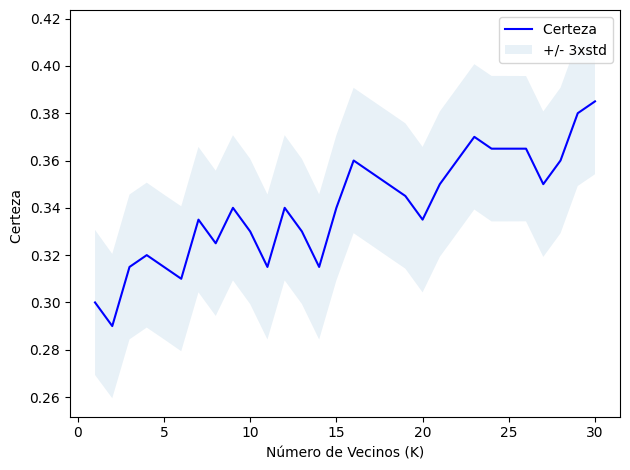

In [57]:
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Certeza ', '+/- 3xstd'))
plt.ylabel('Certeza ')
plt.xlabel('Número de Vecinos (K)')
plt.tight_layout()
plt.show()

In [58]:
print( "La mejor aproximación de certeza fue con ", mean_acc.max(), "con k=", mean_acc.argmax()+1) 

La mejor aproximación de certeza fue con  0.385 con k= 30
